In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix

In [5]:
url=pd.read_csv("C:/Users/rishitha/Desktop/IRIS.csv")
url.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
url.shape


(150, 5)

In [7]:
url.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
url.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [10]:
print(url.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


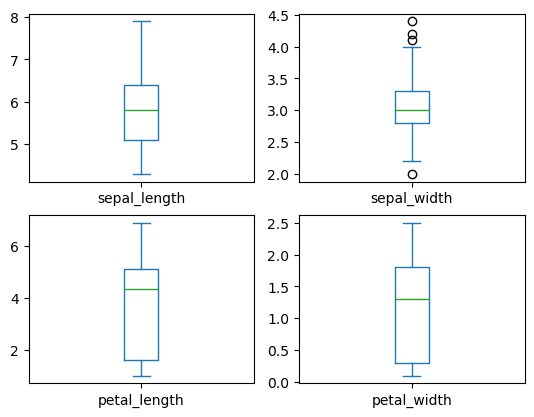

In [11]:
url.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

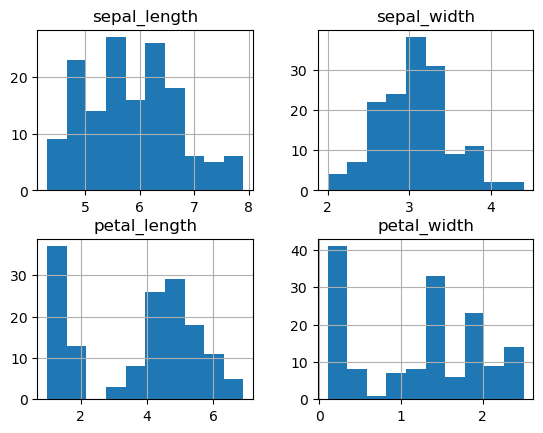

In [12]:
url.hist()
pyplot.show()

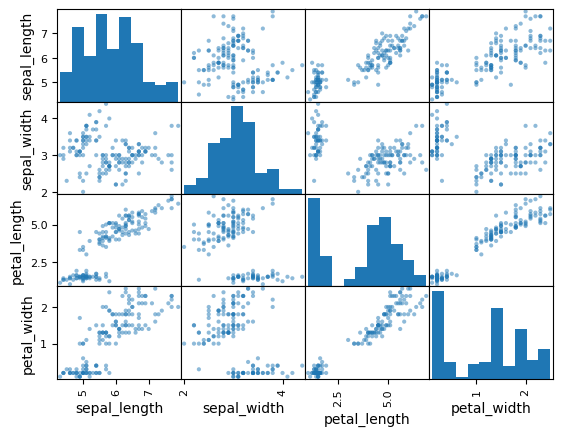

In [13]:
scatter_matrix(url)
pyplot.show()


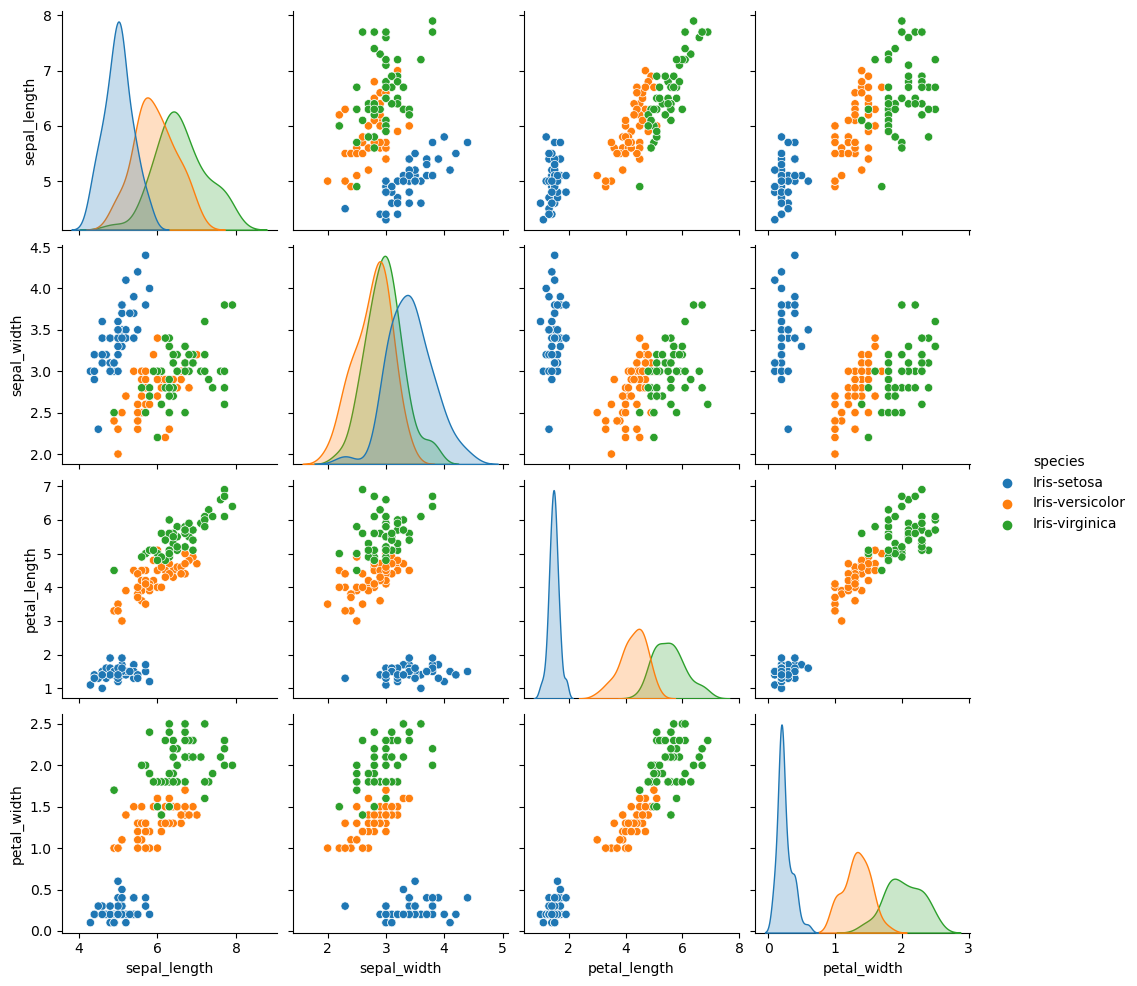

In [15]:
#visualize the whole dataset
sns.pairplot(url,hue='species')


In [16]:
data=url.values
x=data[:,0:4]
y=data[:,4]
#calculate average of each features for all classes
Y_Data=np.array([np.average(x[:,i][y==j].astype('float32')) for i in range(x.shape[1]) for j in (np.unique(y))])
Y_Data_reshaped=Y_Data.reshape(4,3)
Y_Data_reshaped=np.swapaxes(Y_Data_reshaped,0,1)
x_axis=np.arange(len(columns)-1)
width=0.25

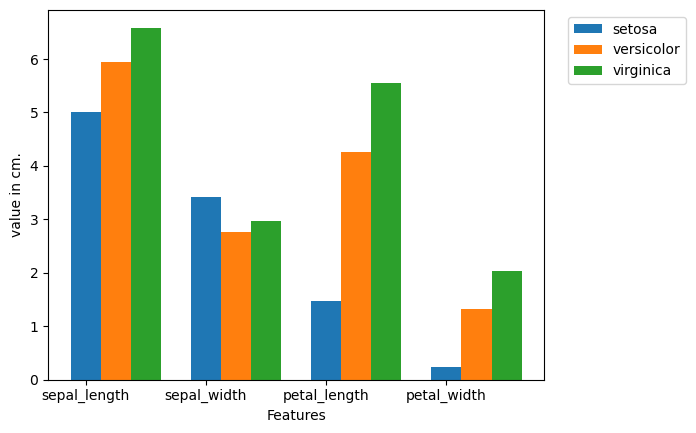

In [17]:
pyplot.bar(x_axis,Y_Data_reshaped[0],width,label='setosa')
pyplot.bar(x_axis+width,Y_Data_reshaped[1],width,label='versicolor')
pyplot.bar(x_axis+width*2,Y_Data_reshaped[2],width,label='virginica')
pyplot.xticks(x_axis,columns[:4])
pyplot.xlabel('Features')
pyplot.ylabel('value in cm.')
pyplot.legend(bbox_to_anchor=(1.3,1))
pyplot.show()

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [19]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [20]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))

LR:0.941667(0.065085)
LDA:0.975000(0.038188)
KNN:0.958333(0.041667)
CART:0.950000(0.055277)
NB:0.950000(0.055277)
SVM:0.983333(0.033333)


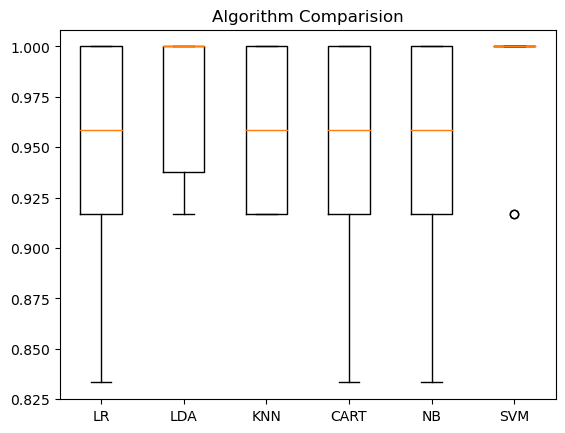

In [21]:
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparision')
pyplot.show()

In [22]:
model=SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [23]:
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

